In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class LinearRegression():

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # def calculateCost(self):
    #   diff = np.power((self.X.dot(self.theta.T) - self.Y), 2)
    #   print('self.theta.T : ' , self.theta.T)
    #   print('self.Y : ' , self.Y)
    #   print('self.X : ' , self.X)
    #   return np.sum(diff) / (2 * self.m)
    def calculateCost(self):
      inner = np.power(((self.X * self.theta.T) - self.Y), 2)
      return np.sum(inner) / (2 * len(self.X))



    def gradient_descent(self, X, Y):

        self.m, self.n = X.shape
        self.theta = np.matrix(np.zeros(self.n))
        self.X = np.matrix(X.values)
        self.Y = np.matrix(Y.values)
        self.cost = []

        for i in range(self.iterations):
            self.update_thetas()
            self.cost.append(self.calculateCost())
        return self


    def update_thetas(self):
        self.h = self.predicted_Y()
        self.theta = self.theta - self.learning_rate * (  self.X.T.dot( self.Y.T - self.h ) / self.m ).T
        return self

    
    def predicted_Y(self):
        return self.X.dot(self.theta.T)





In [125]:
house_data = pd.read_csv("house_data.csv")
# house_data.insert(0,"Ones", 1)
# print(house_data.head())
house_data = (house_data - house_data.mean()) / house_data.std()
# print('********************************')
# print(house_data.head())
# 
flag = False
if flag:
    X = house_data[['sqft_living']]
else:
    X = house_data.loc[:,['grade', 'bathrooms', 'lat', 'sqft_living', 'view']]
X.insert(0,"Ones", 1)
Y = house_data['price']

# print(X)
# print(Y)

learning_rate = 0.01
iterations = 100

linearModel = LinearRegression(learning_rate , iterations)
linearModel.gradient_descent(X,Y)




In [126]:
print(linearModel.theta)
print(linearModel.cost[-1])

f = linearModel.X.dot(linearModel.theta.T)

# print(X)
# print(Y)

# print(f)
# house_data.grade

[[-1.00435674e-13 -2.98615134e+00 -2.74908043e+00 -7.53991011e-01
  -3.10150359e+00 -1.52926958e+00]]
814392.1146388851


[10809.946766080942, 10822.191532152014, 10843.368451367282, 10874.14990754356, 10915.24864233204, 10967.419996791994, 11031.464273416519, 11108.229224992307, 11198.612676996774, 11303.565290599676, 11424.093473698209, 11561.262447811037, 11716.199479063856, 11890.09728193514, 12084.217604878064, 12299.895007424235, 12538.540838866842, 12801.647429160323, 13090.792503225643, 13407.643830439452, 13753.964121701109, 14131.616187125908, 14542.568368091439, 14988.900258085403, 15472.808727561302, 15996.614268808939, 16562.76767767221, 17173.857089848887, 17832.61539041413, 18541.92801620799, 19304.841171732092, 20124.57048030605, 21004.510093354318, 21948.242281901254, 22959.547535609905, 24042.415196028393, 25201.05465209992, 26439.90712746221, 27763.6580906133, 29177.2503206344, 30685.897662885483, 32295.099510881337, 34010.65605244422, 35838.68432024752, 37785.63508892773, 39858.31066317644, 42063.88360353464, 44409.91643905977, 46904.38241860506, 49555.68735514904, 52372.69262048088, 5

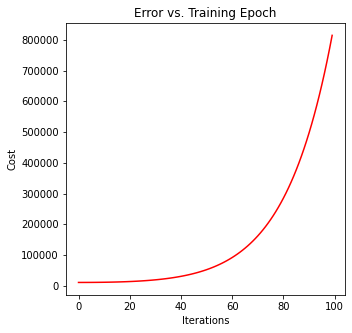

In [127]:
# fig, ax = plt.subplots(figsize=(7,7))
# ax.plot(X, f, 'r', label='Prediction')
# ax.scatter(house_data.grade, house_data.price, label='Training Data')
# ax.legend(loc=2)
# ax.set_xlabel('Grade')
# ax.set_ylabel('Price')
# ax.set_title('Grade vs. Price')


# get best fit line for bathrooms vs. Price

# x = np.linspace(house_data.bathrooms.min(), house_data.bathrooms.max(), 100)
# print('x \n',linearModel.X)
# print('theta \n',linearModel.theta)


fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations), linearModel.cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

print(linearModel.cost)


In [130]:
import sklearn.metrics as sm
print("Explain variance score =", round(sm.explained_variance_score(Y, linearModel.h), 2)) 
print("R2 score =", round(sm.r2_score(Y, linearModel.h), 2))

Explain variance score = -82.93
R2 score = -82.93
